In [142]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

In [143]:
df = pd.read_csv('boston_2013.csv', encoding = "ISO-8859-1")

In [144]:
remove = ['name', 'ctz', 'state']
df = df.drop(remove, 1)

Text(0.5,0,'Gender')

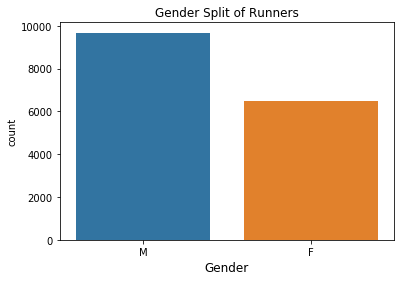

In [5]:
ax = sns.countplot(x="gender", data=df)
plt.rcParams['figure.figsize']=(4,4)
ax.set_title('Gender Split of Runners', fontsize=12)
plt.xlabel('Gender', fontsize=12)

60% of the runners were males.

In [6]:
gender_grouped = df.groupby('gender').size().sort_values(ascending=False)/len(df) * 100
gender_grouped

gender
M    59.886167
F    40.113833
dtype: float64

Text(0.5,1,'Age Distribution of Runners')

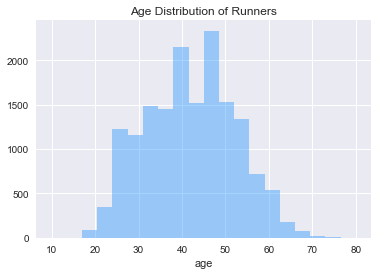

In [7]:
sns.set(style="darkgrid")
plt.rcParams['figure.figsize']=(6,4)
ax = sns.distplot(df['age'], bins=20, kde=False, hist_kws={'range':(10,80)}, color="dodgerblue")
ax.set_title('Age Distribution of Runners', fontsize=12)

Most runners were aged between 30-50, with the younger runners having a quicker average finishing time.

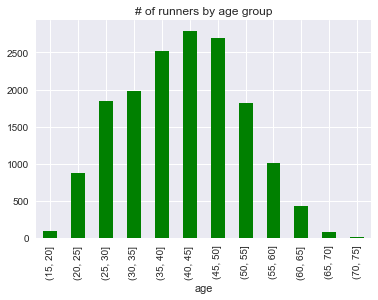

In [8]:
df['official'].groupby(pd.cut(df['age'], range(15,80,5))).aggregate(len).plot(
    kind="bar", title="# of runners by age group", color='g')

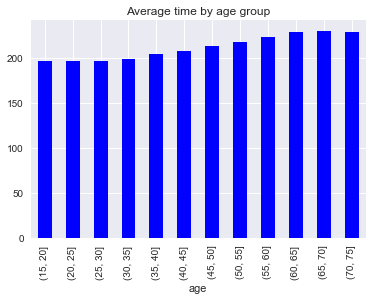

In [9]:
df['official'].groupby(pd.cut(df['age'], range(15,80,5))).aggregate(np.average).plot(
    kind="bar", title="Average time by age group", color='b')

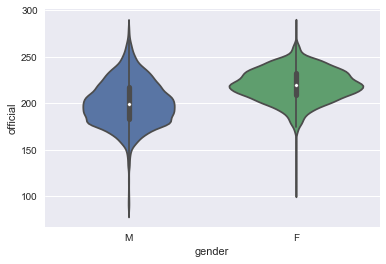

In [10]:
ax = sns.violinplot(x="gender", y="official", data=df)

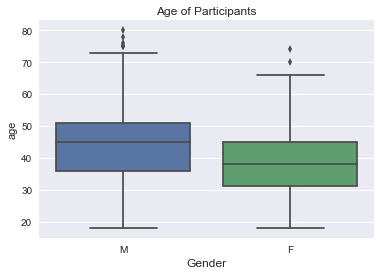

In [11]:
p1=sns.boxplot(x='gender', y='age', data=df)
plt.rcParams['figure.figsize']=(6,6)
p1.set_title('Age of Participants', fontsize=12)
plt.xlabel('Gender', fontsize=12)
plt.show()

Text(0.5,0.98,'Finishing Time against Age')

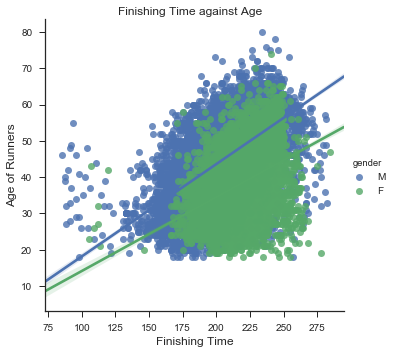

In [12]:
sns.set_style("ticks")
ax = sns.lmplot(x="official", y="age", data=df, hue="gender")
plt.xlabel('Finishing Time', fontsize=12)
plt.ylabel('Age of Runners', fontsize=12)
ax.fig.suptitle('Finishing Time against Age', fontsize=12)

USA had the most number of runners, followed by Canada, UK then Japan.
New York and Chicago were the most popular cities. 

Text(0.5,1,'Top 10 Most Popular Countries')

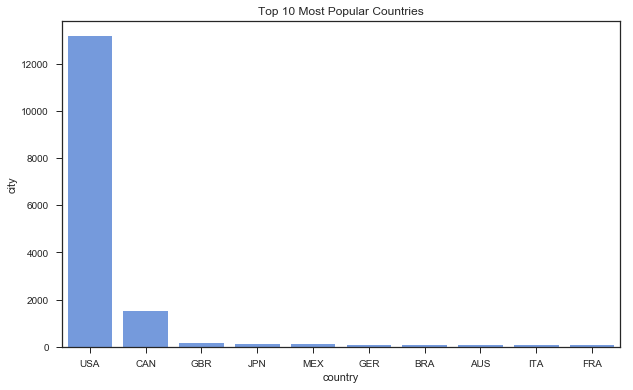

In [13]:
s = df.groupby('country').count()['city'].sort_values(ascending=False).head(10)
g = sns.barplot(s.index, s, color='cornflowerblue')
g.figure.set_size_inches(10,6)
g.set_title("Top 10 Most Popular Countries")

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

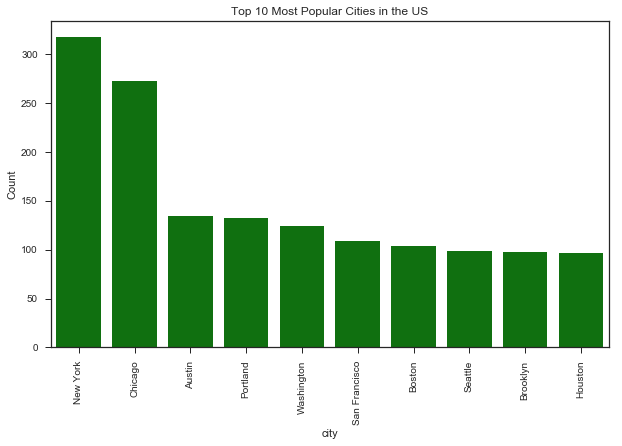

In [14]:
#Most popular state
s = df[df['country'] == 'USA'].groupby('city').count()['country'].sort_values(ascending=False).head(10)
g = sns.barplot(s.index, s, color='g')
g.set(ylabel = 'Count', title = 'Top 10 Most Popular Cities in the US')
g.figure.set_size_inches(10,6)
plt.xticks(rotation=90)

In [145]:
di = {"M":0, "F":1}   #converting target variable to boolean
df= df.replace({"gender": di})

In [146]:
remove2 = ['city', 'country', 'bib']
df = df.drop(remove2, 1)

In [147]:
df['25k'] = df['25k'].replace('-', np.NaN)
df['25k'] = pd.to_numeric(df['25k'], errors='coerce')
df['25k'].fillna((df['25k'].mean()), inplace=True)

df['5k'] = df['5k'].replace('-', np.NaN)
df['5k'] = pd.to_numeric(df['5k'], errors='coerce')
df['5k'].fillna((df['5k'].mean()), inplace=True)

df['10k'] = df['10k'].replace('-', np.NaN)
df['10k'] = pd.to_numeric(df['10k'], errors='coerce')
df['10k'].fillna((df['10k'].mean()), inplace=True)

df['20k'] = df['20k'].replace('-', np.NaN)
df['20k'] = pd.to_numeric(df['20k'], errors='coerce')
df['20k'].fillna((df['20k'].mean()), inplace=True)

df['30k'] = df['30k'].replace('-', np.NaN)
df['30k'] = pd.to_numeric(df['30k'], errors='coerce')
df['30k'].fillna((df['30k'].mean()), inplace=True)

df['35k'] = df['35k'].replace('-', np.NaN)
df['35k'] = pd.to_numeric(df['35k'], errors='coerce')
df['35k'].fillna((df['35k'].mean()), inplace=True)

df['40k'] = df['40k'].replace('-', np.NaN)
df['40k'] = pd.to_numeric(df['40k'], errors='coerce')
df['40k'].fillna((df['40k'].mean()), inplace=True)

df['half'] = df['half'].replace('-', np.NaN)
df['half'] = pd.to_numeric(df['half'], errors='coerce')
df['half'].fillna((df['half'].mean()), inplace=True)

In [148]:
#df = df[(df["gender"] == 0)]

In [149]:
# Define the features and the outcome.
X = df.drop('gender',1)
y = df['gender']

In [150]:
X.columns

Index(['25k', 'age', 'division', '10k', 'half', 'official', 'overall', 'pace',
       '30k', '5k', 'genderdiv', '20k', '35k', '40k'],
      dtype='object')

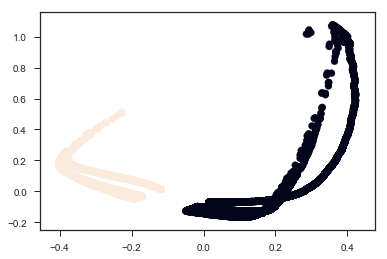

,25k,age,division,10k,half,official,overall,pace,30k,5k,genderdiv,20k,35k,40k
16144,137.72,59,172,54.80,115.85,241.75,16348,9.23,166.93,27.68,6252,109.77,197.73,228.35
16145,134.52,61,30,51.30,112.55,241.25,16280,9.22,166.12,25.38,6212,106.63,197.92,228.53
16146,136.77,74,2,53.07,114.53,240.57,16180,9.18,166.37,25.78,6150,108.57,197.32,226.78
16147,142.00,61,45,56.38,119.37,247.13,16988,9.43,171.92,28.15,6666,113.25,203.40,233.90
16148,141.97,65,8,56.13,119.40,248.88,17129,9.50,172.73,28.13,6753,113.18,202.82,234.50
16149,140.37,55,133,55.28,118.20,238.55,15799,9.10,169.50,27.62,5925,112.00,198.20,226.08
16150,139.62,55,167,55.83,117.32,241.30,16286,9.22,168.97,27.92,6216,111.37,198.60,228.53
16151,136.72,58,107,55.22,115.35,235.17,15059,8.98,165.00,27.62,5510,109.55,193.95,222.12
16152,137.85,60,42,54.92,116.00,245.55,16834,9.37,168.87,27.90,6557,109.98,201.25,231.68
16153,135.77,55,151,53.72,113.95,240.43,16154,9.18,165.43,26.95,6135,108.07,196.57,227.13


In [151]:
# Normalize the data.
X_norm = normalize(X)

X_pca = PCA(2).fit_transform(X_norm)

# Calculate predicted values.
#Left side is cluster 1, right is cluster 2
y_pred = KMeans(n_clusters=2, random_state=42).fit_predict(X_pca)

# Plot the solution.
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
plt.show()

#X['pred'] = y_pred
X.tail(20)

#Check the solution against the data.
#print('Comparing k-means clusters against the data:')
#print(pd.crosstab(y_pred, y))

Two clusters likely represent the male vs female runners.

Even with 50 mini data points, we are able to explain the variance in the data.

In [153]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans

# Each batch will be made up of 50 data points.
minibatchkmeans = MiniBatchKMeans(
    init='random',
    n_clusters=2,
    batch_size=50)
minibatchkmeans.fit(X_pca)

# Add the new predicted cluster memberships to the data frame.
predict_mini = minibatchkmeans.predict(X_pca)

# Check the MiniBatch model against our earlier one.
print('Comparing k-means and mini batch k-means solutions:')
print(pd.crosstab(predict_mini, y_pred))

#Getting the same predictions using MiniBatch (50)

Comparing k-means and mini batch k-means solutions:
col_0     0     1
row_0            
0      9689     0
1         0  6475


In [154]:
# Normalize the data.
X_norm = normalize(X)

X_pca = PCA(2).fit_transform(X_norm)

In [155]:
#Divide into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(
    X_pca,
    y,
    test_size=0.1,
    random_state=42)

In [159]:
from sklearn.cluster import MeanShift, estimate_bandwidth

#Here we set the bandwidth. This function automatically derives a bandwidth
#number based on an inspection of the distances among points in the data.
#We're getting a 25 percentile distance. If quantile is 0.5, thats the median. 
bandwidth = estimate_bandwidth(X_train, quantile=0.25, n_samples=1000)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train)

# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))


Number of estimated clusters: 3


In [160]:
print(pd.DataFrame(X_train).head())

          0         1
0 -0.347550  0.089590
1  0.066794 -0.161067
2 -0.329711  0.074594
3 -0.361579  0.283009
4  0.317940  0.062588


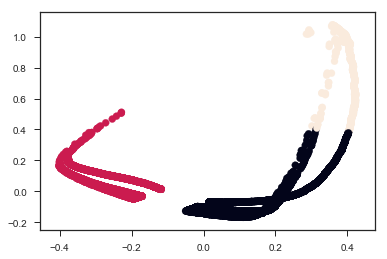

Comparing the assigned categories to the ones in the data:
col_0      0     1    2
gender                 
0       8368     0  330
1          0  5842    7


In [161]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=labels)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,labels))

In [ ]:
from sklearn.cluster import SpectralClustering

n_clusters=2

# Declare and fit the model.
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X_train)

#Predicted clusters.
predict=sc.fit_predict(X_train)

#Graph results.
plt.scatter(X_train[:, 0], X_train[:, 1], c=predict)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,predict))

In [ ]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics

# Declare the model and fit it in one statement.
# Note that you can provide arguments to the model, but we didn't.
af = AffinityPropagation().fit(X_train)
print('Done')

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))
